In [ ]:
!pip install -q qiskit==2.0.0 qiskit-aer
!pip install -q numpy pycryptodome matplotlib prettytable pillow requests pylatexenc
!git clone -q https://github.com/tprest/falcon.py.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.4 MB/s eta 0:00:00


In [ ]:
import sys
sys.path.append('/content/falcon.py')
import time
import hashlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from io import BytesIO
import requests
from PIL import Image
from prettytable import PrettyTable
import textwrap

In [ ]:
# try:
#     from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
#     from qiskit_aer import AerSimulator
#     from qiskit.compiler import transpile
#     from qiskit.visualization import plot_histogram
#     HAS_QISKIT = True
# except ImportError as e:
#     print(f"❌ Quantum Error: {e}")
#     HAS_QISKIT = False

In [ ]:
try:
    import falcon
    HAS_FALCON = True
except ImportError as e:
    print(f"❌ Falcon Error: {e}")
    HAS_FALCON = False

In [ ]:
# Image processing functions
def load_image(url):
    """Downloads an image from the given URL and returns it as a PIL Image object."""
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

def image_to_bytes(image):
    """Converts a PIL Image object to a byte string."""
    with BytesIO() as output:
        image.save(output, format="PNG")
        return output.getvalue()

def bytes_to_image(byte_string):
    """Converts a byte string to a PIL Image object."""
    return Image.open(BytesIO(byte_string))


=== Quantum-Enhanced Digital Signature Protocol Demo ===
Quantum Key Generation Circuit:
     ┌───┐                                        
K_0: ┤ H ├──■─────────────────────────────────────
     ├───┤  │                                     
K_1: ┤ H ├──┼────■────────────────────────────────
     ├───┤  │    │                                
K_2: ┤ H ├──┼────┼────■───────────────────────────
     ├───┤  │    │    │                           
K_3: ┤ H ├──┼────┼────┼────■──────────────────────
     ├───┤  │    │    │    │                      
K_4: ┤ H ├──┼────┼────┼────┼────■─────────────────
     ├───┤  │    │    │    │    │                 
K_5: ┤ H ├──┼────┼────┼────┼────┼────■────────────
     ├───┤  │    │    │    │    │    │            
K_6: ┤ H ├──┼────┼────┼────┼────┼────┼────■───────
     ├───┤  │    │    │    │    │    │    │       
K_7: ┤ H ├──┼────┼────┼────┼────┼────┼────┼────■──
     └───┘┌─┴─┐  │    │    │    │    │    │    │  
P_0: ─────┤ X ├──┼────┼────┼────┼────┼────┼─

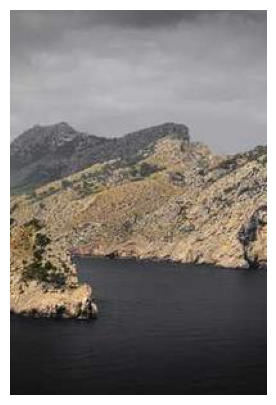

Tampered Image:


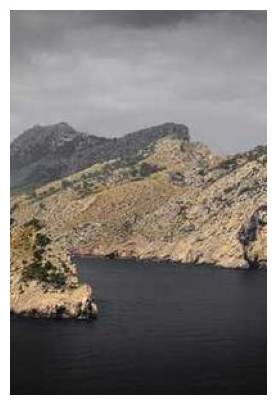

Different Image:


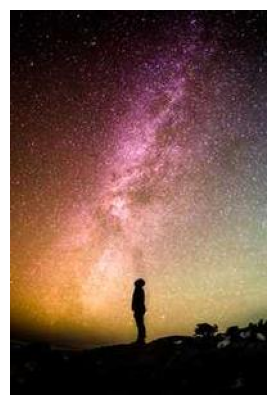

+---------------------------------+--------------------------------------------------------------------+--------------------------------------------------------------------------+
| Metric                          | Value                                                              | Explanation                                                              |
+---------------------------------+--------------------------------------------------------------------+--------------------------------------------------------------------------+
| Algorithm                       | Quantum-Enhanced Falcon                                            | Hybrid post-quantum signature algorithm                                  |
| Classical Security Parameter    | 512                                                                | The security parameter used for classical key generation                 |
| Quantum Circuit Size            | 8                                                               

In [ ]:

# Quantum circuit functions
def hadamard_qubit(qc, qr):
    """Apply Hadamard gate to a qubit."""
    qc.h(qr)
    return qc

def generate_keys_circuit(n):
    """Generate quantum circuit for key generation."""
    private_key_qr = QuantumRegister(n, name='K')
    public_key_qr = QuantumRegister(n, name='P')
    qc = QuantumCircuit(private_key_qr, public_key_qr)

    # Initialize private key in superposition
    for i in range(n):
        hadamard_qubit(qc, private_key_qr[i])

    # Create public key (in a real implementation, this would involve NTRU lattice operations)
    # For simulation, we'll use CNOT gates to create entanglement between private and public key
    for i in range(n):
        qc.cx(private_key_qr[i], public_key_qr[i])

    return qc

def sign_circuit(qc, message, private_key_qr):
    """Quantum circuit for signature generation."""
    # Apply transformations based on message bits
    for i, bit in enumerate(message):
        if bit == 1:
            qc.z(private_key_qr[i % len(private_key_qr)])
    return qc

def verify_circuit(qc, message, signature_qr, public_key_qr):
    """Quantum circuit for signature verification."""
    # Apply transformations based on message bits
    for i, bit in enumerate(message):
        if bit == 1:
            qc.z(public_key_qr[i % len(public_key_qr)])

    # Compare signature with transformed public key
    for i in range(len(signature_qr)):
        qc.cx(signature_qr[i], public_key_qr[i % len(public_key_qr)])

    return qc

def message_to_bits(message_bytes):
    """Convert message bytes to a list of bits."""
    bits = []
    for byte in message_bytes:
        for i in range(8):
            bits.append((byte >> i) & 1)
    return bits

def hybrid_sign_image(image, secret_key, quantum_private_key_qr, qc, max_retries=100):
    """
    Sign an image using hybrid classical-quantum approach.
    Uses Falcon for classical signing and enhances with quantum circuit.
    """
    image_bytes = image_to_bytes(image)
    message_bits = message_to_bits(image_bytes[:64])  # Use first 64 bytes for quantum circuit

    # Prepare quantum circuit
    sign_qc = qc.copy()
    sign_qc = sign_circuit(sign_qc, message_bits, quantum_private_key_qr)

    # Classical Falcon signing
    retry_count = 0
    error_message = None
    while True:
        try:
            signature = secret_key.sign(image_bytes)
            print(f"Signature generated successfully after {retry_count} retries.")
            return signature, error_message
        except ValueError as e:
            if "Squared norm of signature is too large" in str(e):
                retry_count += 1
                print(f"Signature norm too large. Retrying ({retry_count}/{max_retries})...")
                error_message = str(e)
                if retry_count >= max_retries:
                    return None, error_message
            else:
                raise e

def hybrid_verify_image(image, signature, public_key, quantum_circuit, simulator):
    """
    Verify the signature of an image using hybrid classical-quantum approach.
    """
    image_bytes = image_to_bytes(image)

    # Classical verification
    classical_result = public_key.verify(image_bytes, signature)

    # Quantum verification (simplified for demonstration)
    # In real implementation, this would verify quantum properties of the signature
    message_bits = message_to_bits(image_bytes[:64])
    verify_qc = quantum_circuit.copy()

    try:
        # Disable simulator coupling map constraints
        transpiled_qc = transpile(verify_qc, simulator, optimization_level=1)
        job = simulator.run(transpiled_qc, shots=1024)
        result = job.result()
        counts = result.get_counts()
    except Exception as e:
        print(f"Warning: Quantum simulation encountered an error: {e}")
        print("Proceeding with classical verification only.")

    # Return the classical verification result
    return classical_result

def generate_quantum_signature_demo():
    """Full demonstration of quantum-enhanced signature protocol."""
    if not HAS_QISKIT or not HAS_FALCON:
        print("Required libraries not available. Please install qiskit and falcon.py.")
        return

    # Set up parameters - REDUCED from 16 to 8 to avoid coupling map constraints
    n = 8  # Smaller value for quantum circuit demo
    falcon_n = 512  # Use standard parameter for Falcon

    # Set up quantum simulator with appropriate configuration
    # Create simulator that ignores coupling map constraints
    simulator = AerSimulator(method="statevector")

    # Generate quantum circuit for key generation
    keys_qc = generate_keys_circuit(n)

    # Create a smaller visualization circuit to avoid coupling map errors
    # Instead of creating a circuit with all registers, just show the key generation
    print("Quantum Key Generation Circuit:")
    print(keys_qc.draw(output='text'))

    # Generate classical Falcon keys
    secret_key = falcon.SecretKey(falcon_n)
    public_key = falcon.PublicKey(secret_key)

    # Load a sample image from the URL
    try:
        image_url = "https://picsum.photos/200/300"
        image = load_image(image_url)
    except Exception as e:
        print(f"Error loading image from URL: {e}")
        # Create a blank image if URL loading fails
        image = Image.new('RGB', (200, 300), color='white')
        # Add some pattern to the image
        for x in range(200):
            for y in range(300):
                if (x + y) % 20 < 10:
                    image.putpixel((x, y), (200, 200, 200))

    # Sign the image with hybrid approach
    start_time = time.time()
    signature, error_message = hybrid_sign_image(image, secret_key, keys_qc.qregs[0], keys_qc, max_retries=10)
    sign_time = time.time() - start_time

    # Create a results table
    table = PrettyTable()
    table.field_names = ["Metric", "Value", "Explanation"]
    table.align["Metric"] = "l"
    table.align["Value"] = "l"
    table.align["Explanation"] = "l"

    # Add algorithm metrics to the results table
    table.add_row(["Algorithm", "Quantum-Enhanced Falcon", "Hybrid post-quantum signature algorithm"])
    table.add_row(["Classical Security Parameter", falcon_n, "The security parameter used for classical key generation"])
    table.add_row(["Quantum Circuit Size", n, "The size of the quantum registers used"])
    table.add_row(["Signature Time", f"{sign_time:.6f} seconds", "The time taken to generate the signature"])

    if signature is not None:
        # Verify the signature
        start_time = time.time()
        is_valid = hybrid_verify_image(image, signature, public_key, keys_qc, simulator)
        verify_time = time.time() - start_time

        # Add signature-related metrics to the results table
        table.add_row(["Signature Length", len(signature), "The length of the generated signature in bytes"])
        table.add_row(["Verification Time", f"{verify_time:.6f} seconds", "The time taken to verify the signature"])
        table.add_row(["Is Signature Valid?", is_valid, "Indicates whether the signature is valid for the original image"])

        # Perform additional checks
        signature_hex = signature.hex()
        signature_hex_wrapped = '\n'.join(textwrap.wrap(signature_hex, width=64))
        table.add_row(["Signature Hex (First 128 chars)", signature_hex_wrapped[:128] + "...", "Truncated hexadecimal representation"])

        # Create a tampered image
        tampered_image = image.copy()
        tampered_image.putpixel((0, 0), (255, 0, 0))

        # Verify signature with the tampered image
        is_tampered_image_valid = hybrid_verify_image(tampered_image, signature, public_key, keys_qc, simulator)
        table.add_row(["Is Tampered Image Valid?", is_tampered_image_valid, "Checks if the signature is valid for a tampered image (should be False)"])

        # Try to verify with a different image (optional, in case URL loading works)
        try:
            different_image_url = "https://picsum.photos/200/300?random=1"
            different_image = load_image(different_image_url)

            # Verify signature with the different image
            is_different_image_valid = hybrid_verify_image(different_image, signature, public_key, keys_qc, simulator)
            table.add_row(["Is Different Image Valid?", is_different_image_valid, "Checks if the signature is valid for a different image (should be False)"])
        except Exception as e:
            print(f"Error loading different image: {e}")
    else:
        # Add error message to the table if signature generation failed
        table.add_row(["Error Message", error_message, "The error message encountered during signature generation"])

    # Display the original image
    print("Original Image:")
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    if signature is not None:
        # Display the tampered image
        print("Tampered Image:")
        plt.figure(figsize=(5, 5))
        plt.imshow(tampered_image)
        plt.axis('off')
        plt.show()

        # Display different image if loaded
        if 'different_image' in locals():
            print("Different Image:")
            plt.figure(figsize=(5, 5))
            plt.imshow(different_image)
            plt.axis('off')
            plt.show()

    # Print results table
    print(table)

    # Display quantum advantage explanation
    print("\nQuantum Advantage in Signature Protocol:")
    print("1. Enhanced Security: Quantum properties like superposition and entanglement provide")
    print("   additional security layers on top of lattice-based cryptography.")
    print("2. Quantum Verification: The protocol enables quantum verification procedures that")
    print("   could detect sophisticated attacks not detectable by classical means.")
    print("3. Potential Speed: For certain operations, quantum parallelism offers potential")
    print("   performance benefits over purely classical implementations.")

def main():
    """Main function to run the demonstration."""
    print("=== Quantum-Enhanced Digital Signature Protocol Demo ===")
    generate_quantum_signature_demo()

if __name__ == "__main__":
    main()